In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten

In [ ]:
import numpy as np

In [ ]:
test = pd.read_csv('Final_Test.csv')
train = pd.read_csv("Final_Train.csv")

In [ ]:
final = train.drop(['Pediatric' , 'Geriatric' , '15-24' , '25-34' , '35-44' , '45-54' , '55-64' , 'NEP Total' , 'SumOfHIV_infected'] , axis = 1)

In [ ]:
final['HIV'] = train['SumOfHIV_infected']

In [ ]:
final.head(20)

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,LUDHIANA,MADURAI,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,quarter,rainfall,relative_humidity,average_temperature,NSP Total/ NewMicConf Total,Relapse Total,NSN Total,so2,no2,rspm,NEP Total
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,1,2.6,21.728250,18.952113,491,109,421,7.803030,23.744767,215.715909,275
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,2,150.8,35.571308,30.605233,795,127,551,7.341732,22.504294,184.648809,391
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,3,368.9,81.344806,28.749821,649,118,383,7.021000,17.422785,136.511628,363
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,4,0.8,54.863122,22.181595,686,126,346,6.832886,27.542857,224.551219,291
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,1,8.8,32.535027,20.001286,719,148,364,7.278723,21.356085,189.052632,378
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,2,36.8,20.674441,32.772168,717,141,414,6.944961,17.970899,179.405128,448
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,3,149.9,61.730921,30.284552,641,151,356,5.827869,17.008065,119.015306,372
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,4,149.8,54.234982,21.075502,649,129,343,6.391549,26.495676,227.760638,299
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,1,7.5,35.871813,20.304781,773,137,348,9.442460,11.597619,205.581395,353
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2,7.8,19.217093,34.753459,734,121,412,9.752326,11.650388,214.109929,458


In [ ]:
final = final.fillna(method ='bfill') 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(final.values)
scaled_df = pd.DataFrame(scaled , columns = final.columns)

In [ ]:
scaled_df

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,LUDHIANA,MADURAI,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,quarter,rainfall,relative_humidity,average_temperature,NSP Total/ NewMicConf Total,Relapse Total,NSN Total,so2,no2,rspm,Geriatric
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000684,0.045074,0.452561,0.232995,0.288410,0.404624,0.179833,0.041652,0.020741,0.157576
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.039646,0.230408,0.845095,0.387310,0.336927,0.529865,0.169201,0.039022,0.017539,0.224242
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.096985,0.843237,0.782596,0.313198,0.312668,0.368015,0.161810,0.028246,0.012578,0.181818
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000210,0.488693,0.561346,0.331980,0.334232,0.332370,0.157474,0.049707,0.021652,0.218182
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.000000,0.002314,0.189758,0.487903,0.348731,0.393531,0.349711,0.167749,0.036587,0.017993,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.9,1.000000,0.041512,0.844982,0.677657,0.376142,0.331536,0.237958,0.203658,0.028486,0.006297,0.412121
3368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000342,0.471332,0.669981,0.448223,0.331536,0.274566,0.221259,0.034250,0.005970,0.430303
3369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
from tensorflow.keras.layers import Dropout , MaxPool1D , LSTM , SpatialDropout1D

In [ ]:
model = Sequential()
model.add(Conv1D(88, 2, activation="relu", input_shape=(88, 1)))
model.add(SpatialDropout1D(0.3))
model.add(Conv1D(88, 2,activation="relu"))
model.add(Flatten())
model.add(Dense(88, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss="mae", optimizer="adam")

In [ ]:
X = final.drop('HIV' , axis = 1)
y = final['HIV']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler()
scaledX = scalerX.fit_transform(X.values)
scaledX_df = pd.DataFrame(scaledX , columns = X.columns)

In [ ]:
y_arr = np.array(y)

In [ ]:
y_arr = y_arr.reshape(1 , -1)

In [ ]:
y_arr

array([[275, 391, 363, ..., 431, 460, 470]])

In [ ]:
scalerY = MinMaxScaler()

In [ ]:
scaled_y = scalerY.fit_transform(final['NEP Total'].values.reshape(-1,1))

In [ ]:
scaled_y

array([[0.26871795],
       [0.38769231],
       [0.35897436],
       ...,
       [0.42871795],
       [0.45846154],
       [0.46871795]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,LUCKNOW,LUDHIANA,MADURAI,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,quarter,rainfall,relative_humidity,average_temperature,NSP Total/ NewMicConf Total,Relapse Total,NSN Total,so2,no2,rspm
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,1,2.6,21.728250,18.952113,491,109,421,7.803030,23.744767,215.715909
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,2,150.8,35.571308,30.605233,795,127,551,7.341732,22.504294,184.648809
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,3,368.9,81.344806,28.749821,649,118,383,7.021000,17.422785,136.511628
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2008,4,0.8,54.863122,22.181595,686,126,346,6.832886,27.542857,224.551219
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,1,8.8,32.535027,20.001286,719,148,364,7.278723,21.356085,189.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2017,4,157.9,81.475168,25.634516,773,125,248,8.836826,17.536145,75.570487
3368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,1,1.3,53.566390,25.406647,915,125,286,9.600547,20.254041,72.399197
3369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,2,284.1,68.737323,29.950670,994,141,230,9.746581,20.766438,77.537795
3370,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2018,3,1004.2,88.045541,27.201247,918,105,195,10.048577,20.987388,84.230840


In [ ]:
x = X.values

In [ ]:
x = x.reshape(3372 , 88 , 1)

In [ ]:
final.shape

(3372, 89)

In [ ]:
x = X.values.reshape(3372 , 88 , 1)

In [ ]:
history = model.fit(x, y, batch_size=32,epochs=50, verbose=1 , validation_split=0.150)

Epoch 1/50
90/90 [==============================] - 2s 20ms/step - loss: 23.2685 - val_loss: 25.2992
Epoch 2/50
90/90 [==============================] - 2s 19ms/step - loss: 20.2487 - val_loss: 24.4669
Epoch 3/50
90/90 [==============================] - 2s 19ms/step - loss: 20.1290 - val_loss: 24.1981
Epoch 4/50
90/90 [==============================] - 2s 19ms/step - loss: 19.6394 - val_loss: 24.6442
Epoch 5/50
90/90 [==============================] - 2s 19ms/step - loss: 19.4372 - val_loss: 22.8923
Epoch 6/50
90/90 [==============================] - 2s 19ms/step - loss: 19.1349 - val_loss: 22.8079
Epoch 7/50
90/90 [==============================] - 2s 19ms/step - loss: 19.1444 - val_loss: 22.3392
Epoch 8/50
90/90 [==============================] - 2s 19ms/step - loss: 18.5958 - val_loss: 21.2310
Epoch 9/50
90/90 [==============================] - 2s 19ms/step - loss: 18.0345 - val_loss: 20.5809
Epoch 10/50
90/90 [==============================] - 2s 19ms/step - loss: 17.8269 - val_los

In [ ]:
X_test.shape

(675, 88)

In [ ]:
xx = X_test.values.reshape(675 , 88 , 1)

In [ ]:
pred = model.predict(xx)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test , pred)

0.8001462403763155

In [ ]:
#Pediatric

In [ ]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [ ]:
r2_score(y_test , pred) #Pediatric Test

0.8021451603550197

In [ ]:
mean_absolute_error(y_test , pred)

0.036929645796320326

In [ ]:
mean_squared_error(y_test , pred)

0.0027269285363783055

In [ ]:
#TRAIN

In [ ]:
Y_TRAIN_PRED = model.predict(x)

In [ ]:
r2_score(y_train , Y_TRAIN_PRED)

0.9161746885648828

In [ ]:
mean_absolute_error(y_train , Y_TRAIN_PRED)

0.026867893185875943

In [ ]:
mean_squared_error(y_train , Y_TRAIN_PRED)

0.001410701808318031

In [ ]:
#Geriatric

In [ ]:
pred = model.predict(xx)

In [ ]:
r2_score(y_test , pred) #Geriatric Test

0.8683610682968521

In [ ]:
mean_absolute_error(y_test , pred)

0.03274364186517317

In [ ]:
mean_squared_error(y_test , pred)

0.0019046860167884825

In [ ]:
#TRAIN

In [ ]:
Y_TRAIN_PRED = model.predict(x)

In [ ]:
r2_score(y_train , Y_TRAIN_PRED)

0.9332815382692157

In [ ]:
mean_absolute_error(y_train , Y_TRAIN_PRED)

0.024048306863519796

In [ ]:
mean_squared_error(y_train , Y_TRAIN_PRED)

0.0010648723653270955

In [ ]:
#HIV

In [ ]:
pred = model.predict(xx)

In [ ]:
r2_score(y_test , pred) # Test

0.9223469329487094

In [ ]:
mean_absolute_error(y_test , pred)

0.01868195429686608

In [ ]:
mean_squared_error(y_test , pred)

0.0008785819240478323

In [ ]:
#TRAIN

In [ ]:
Y_TRAIN_PRED = model.predict(x)

In [ ]:
r2_score(y_train , Y_TRAIN_PRED)

0.943461082858931

In [ ]:
mean_absolute_error(y_train , Y_TRAIN_PRED)

0.016374572095305434

In [ ]:
mean_squared_error(y_train , Y_TRAIN_PRED)

0.0007974943435311712

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 87, 32)            96        
_________________________________________________________________
flatten_13 (Flatten)         (None, 2784)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                178240    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 65        
Total params: 178,401
Trainable params: 178,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#----------------------------------------------------------------------

In [ ]:
test.head()

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,LUCKNOW,LUDHIANA,MADURAI,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,1,34.104885,38.800972,19.439224,589.80510,98.35493,321.47223,4.266817,19.016176,197.43720
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,11.862205,22.539581,20.570960,679.25680,123.61379,369.89140,4.026891,20.378157,207.55490
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,3,117.393654,29.516758,32.966130,765.24940,120.36663,205.59604,4.081528,20.484528,229.09227
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,590.517640,76.134630,31.307750,608.72626,101.82116,191.81204,3.947581,18.359955,234.64357
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24.797264,36.707874,19.105430,634.63120,106.91446,242.95451,3.982175,18.168934,218.12114


In [ ]:
test['Pediatric'] = 0
test['Geriatric'] = 0
test['HIV'] = 0

In [ ]:
scaler2 = MinMaxScaler()

In [ ]:
scaled_test = scalerX.fit_transform(test.values)

In [ ]:
scaled_test_df = pd.DataFrame(scaled_test , columns = test.columns)

In [ ]:
scaled_test_df

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,LUCKNOW,LUDHIANA,MADURAI,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.052429,0.265213,0.342683,0.048331,0.294371,0.012513,0.134334,0.004070,0.157650
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.046103,0.149871,0.373295,0.056158,0.374514,0.014122,0.127081,0.004389,0.165605
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.076116,0.199360,0.708567,0.063681,0.364211,0.008662,0.128733,0.004414,0.182538
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.210669,0.530018,0.663710,0.049987,0.305369,0.008204,0.124684,0.003917,0.186902
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.000000,0.049782,0.250366,0.333654,0.052253,0.321529,0.009904,0.125730,0.003872,0.173912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.8,1.000000,0.448388,0.679347,0.555770,0.089571,0.323985,0.008251,0.195765,0.002742,0.045873
1844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.102600,0.508339,0.469920,0.093802,0.358334,0.009032,0.192212,0.002640,0.044911
1845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.333333,0.060652,0.400066,0.569072,

In [ ]:
testing_df = scaled_test_df.drop(['Pediatric' , 'Geriatric' , 'HIV'] , axis = 1)

KeyError: ignored

In [ ]:
scaled_test_df.shape

(1848, 88)

In [ ]:
testing_df_reshape = scaled_test_df.values.reshape(1848 , 88 , 1)


In [ ]:
prediction = model.predict(testing_df_reshape)

In [ ]:
test['Geriatric'] = prediction

In [ ]:
test.head()

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm,Pediatric,Geriatric,HIV
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,1,34.104885,38.800972,19.439224,589.80510,98.35493,321.47223,4.266817,19.016176,197.43720,0.253501,0.034710,-0.063027
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,11.862205,22.539581,20.570960,679.25680,123.61379,369.89140,4.026891,20.378157,207.55490,0.295092,0.039801,-0.043142
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,3,117.393654,29.516758,32.966130,765.24940,120.36663,205.59604,4.081528,20.484528,229.09227,0.305647,0.036636,-0.043993
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,590.517640,76.134630,31.307750,608.72626,101.82116,191.81204,3.947581,18.359955,234.64357,0.273171,0.054650,-0.035694
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24.797264,36.707874,19.105430,634.63120,106.91446,242.95451,3.982175,18.168934,218.12114,0.277577,0.051791,-0.035766


In [ ]:
output = scaler2.inverse_transform(test.values)

In [ ]:
output_df = pd.DataFrame(output , columns = test.columns)

In [ ]:
output_df

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm,Pediatric,Geriatric,HIV
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12114.0,4.0,1.197715e+05,5471.765345,725.446921,6.741307e+06,31004.274165,9.674086e+06,140.974269,81266.548195,251121.097121,0.253501,0.034710,-0.063027
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12114.0,7.0,4.156038e+04,3179.152998,767.287709,7.763709e+06,38965.153602,1.113118e+07,133.037231,87086.923730,263989.994673,0.295092,0.039801,-0.043142
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12114.0,10.0,4.126367e+05,4162.830356,1225.542703,8.746575e+06,37941.740460,6.186996e+06,134.844688,87541.496273,291383.790502,0.305647,0.036636,-0.043993
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12114.0,13.0,2.076265e+06,10735.251432,1164.231651,6.957569e+06,32096.731985,5.772191e+06,130.413572,78462.211971,298444.595920,0.273171,0.054650,-0.035694
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12119.0,4.0,8.704345e+04,5176.669906,713.106407,7.253654e+06,33701.996325,7.311233e+06,131.557986,77645.890778,277429.398892,0.277577,0.051791,-0.035766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12134.0,13.0,5.015449e+06,13703.420092,1016.697527,1.212869e+07,33945.948725,5.814307e+06,208.201796,56999.405978,70290.055880,0.088242,0.132747,0.128345
1844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12139.0,4.0,7.400941e+05,10304.330754,899.356355,1.268146e+07,37357.916287,6.522033e+06,204.313565,55139.650396,68733.236874,0.069157,0.140036,0

In [ ]:
test

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm,Pediatric,Geriatric,HIV
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,1,34.104885,38.800972,19.439224,589.80510,98.35493,321.47223,4.266817,19.016176,197.437200,0.253501,0.034710,-0.063027
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,11.862205,22.539581,20.570960,679.25680,123.61379,369.89140,4.026891,20.378157,207.554900,0.295092,0.039801,-0.043142
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,3,117.393654,29.516758,32.966130,765.24940,120.36663,205.59604,4.081528,20.484528,229.092270,0.305647,0.036636,-0.043993
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,590.517640,76.134630,31.307750,608.72626,101.82116,191.81204,3.947581,18.359955,234.643570,0.273171,0.054650,-0.035694
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24.797264,36.707874,19.105430,634.63120,106.91446,242.95451,3.982175,18.168934,218.121140,0.277577,0.051791,-0.035766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2023,4,1426.400600,97.187710,27.317154,1061.15620,107.68849,193.21156,6.299015,13.337610,55.265408,0.088242,0.132747,0.128345
1844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2024,1,210.520190,73.078130,24.143236,1109.51920,118.51423,216.72934,6.181479,12.902423,54.041416,0.069157,0.140036,0.080101
1845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2024,2,63.020416,57.813250,27.808945,1150.91710,131.67221,241.56010,6.087507,12.862503,53.193733,0.066820,0.153721,0.089671
1846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2024,3,714.588800,75.438350,32.855440,1148.24340,108.13781,184.75706,5.986800,12.870475,52.537240,0.069156,0.148101,0.098185


In [ ]:
test.head()

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm,Pediatric,Geriatric,HIV
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,1,34.104885,38.800972,19.439224,589.80510,98.35493,321.47223,4.266817,19.016176,197.43720,0.253501,0.034710,-0.063027
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,11.862205,22.539581,20.570960,679.25680,123.61379,369.89140,4.026891,20.378157,207.55490,0.295092,0.039801,-0.043142
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,3,117.393654,29.516758,32.966130,765.24940,120.36663,205.59604,4.081528,20.484528,229.09227,0.305647,0.036636,-0.043993
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,590.517640,76.134630,31.307750,608.72626,101.82116,191.81204,3.947581,18.359955,234.64357,0.273171,0.054650,-0.035694
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24.797264,36.707874,19.105430,634.63120,106.91446,242.95451,3.982175,18.168934,218.12114,0.277577,0.051791,-0.035766


In [ ]:
tttt = test.drop(['Pediatric' , 'Geriatric' , 'HIV'] , axis = 1)

In [ ]:
tttt.shape

(1848, 88)

In [ ]:
tttt = tttt.values.reshape(1848 , 88 , 1)

In [ ]:
pppp = model.predict(tttt)

In [ ]:
output = test

In [ ]:
output['HIV'] = pppp

In [ ]:
output.head(30)

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm,Pediatric,Geriatric,HIV
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,1,34.104885,38.800972,19.439224,589.805100,98.354930,321.472230,4.266817,19.016176,197.437200,26.582008,39.071129,9.886550
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,11.862205,22.539581,20.570960,679.256800,123.613790,369.891400,4.026891,20.378157,207.554900,29.340445,45.015896,3.839921
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,3,117.393654,29.516758,32.966130,765.249400,120.366630,205.596040,4.081528,20.484528,229.092270,30.008953,54.583042,0.221649
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,590.517640,76.134630,31.307750,608.726260,101.821160,191.812040,3.947581,18.359955,234.643570,23.115191,46.328091,16.930185
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24.797264,36.707874,19.105430,634.631200,106.914460,242.954510,3.982175,18.168934,218.121140,27.867039,43.599972,7.595315
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,2,59.787980,22.025463,20.548483,641.116900,107.633700,255.282460,4.021679,18.359780,220.348830,28.473507,43.407070,3.687541
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,3,61.272350,29.042738,33.859276,731.491500,117.675674,268.430600,3.961718,17.576843,234.580350,28.940426,51.843121,1.842819
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,4,729.005860,84.325210,31.588997,614.342650,99.314230,237.183870,3.935407,17.106153,233.383440,23.362215,45.442455,18.223555
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,1,32.993380,36.734547,18.744085,600.302500,101.716790,234.094180,3.822018,16.219864,219.043720,27.103823,40.337780,11.430857
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,2,52.600143,21.689234,20.863188,638.487240,109.354774,257.748750,3.754335,16.120268,224.217700,28.432297,42.834270,4.707851


In [ ]:
output.to_csv(r'Output.csv' , index = False)

In [ ]:
chachacha =  output.iloc[: , ['AGRA':'VISAKHAPATNAM']]

SyntaxError: ignored

In [ ]:
col = ['AGRA', 'AIZAWL', 'ALAPPUZHA', 'ALLAHABAD', 'ALWAR', 'AMRAVATI',
       'AMRITSAR', 'BATHINDA', 'BHARUCH', 'BHOPAL', 'BULANDSHAHR', 'CACHAR',
       'CHANDIGARH', 'CHENNAI', 'CHITTOOR', 'COIMBATORE', 'CUTTACK',
       'DAKSHINAKANNADA', 'DEHRADUN', 'DHANBAD', 'DIBRUGARH', 'DURG',
       'EASTKHASIHILLS', 'ERNAKULAM', 'FATEHGARHSAHIB', 'FIROZABAD', 'GANJAM',
       'GHAZIABAD', 'GOLAGHAT', 'GUNTUR', 'GWALIOR', 'HASSAN', 'INDORE',
       'JABALPUR', 'JAIPUR', 'JALANDHAR', 'JALGAON', 'JAMNAGAR', 'JHANSI',
       'JODHPUR', 'KANPURNAGAR', 'KOLHAPUR', 'KOLLAM', 'KORBA', 'KOTTAYAM',
       'KOZHIKODE', 'KURNOOL', 'LATUR', 'LUCKNOW', 'LUDHIANA', 'MADURAI',
       'MORADABAD', 'NAGPUR', 'NASHIK', 'NORTHGOA', 'PALAKKAD', 'PATIALA',
       'PUNE', 'RAJKOT', 'RANCHI', 'RAYAGADA', 'SAGAR', 'SALEM', 'SANGLI',
       'SIRMAUR', 'SOLAN', 'SOLAPUR', 'SONBHADRA', 'SONITPUR', 'SOUTHGOA',
       'SURAT', 'THANE', 'THIRUVANANTHAPURAM', 'VADODARA', 'VALSAD',
       'VARANASI', 'VISAKHAPATNAM']

In [ ]:
output.columns

Index(['AGRA', 'AIZAWL', 'ALAPPUZHA', 'ALLAHABAD', 'ALWAR', 'AMRAVATI',
       'AMRITSAR', 'BATHINDA', 'BHARUCH', 'BHOPAL', 'BULANDSHAHR', 'CACHAR',
       'CHANDIGARH', 'CHENNAI', 'CHITTOOR', 'COIMBATORE', 'CUTTACK',
       'DAKSHINAKANNADA', 'DEHRADUN', 'DHANBAD', 'DIBRUGARH', 'DURG',
       'EASTKHASIHILLS', 'ERNAKULAM', 'FATEHGARHSAHIB', 'FIROZABAD', 'GANJAM',
       'GHAZIABAD', 'GOLAGHAT', 'GUNTUR', 'GWALIOR', 'HASSAN', 'INDORE',
       'JABALPUR', 'JAIPUR', 'JALANDHAR', 'JALGAON', 'JAMNAGAR', 'JHANSI',
       'JODHPUR', 'KANPURNAGAR', 'KOLHAPUR', 'KOLLAM', 'KORBA', 'KOTTAYAM',
       'KOZHIKODE', 'KURNOOL', 'LATUR', 'LUCKNOW', 'LUDHIANA', 'MADURAI',
       'MORADABAD', 'NAGPUR', 'NASHIK', 'NORTHGOA', 'PALAKKAD', 'PATIALA',
       'PUNE', 'RAJKOT', 'RANCHI', 'RAYAGADA', 'SAGAR', 'SALEM', 'SANGLI',
       'SIRMAUR', 'SOLAN', 'SOLAPUR', 'SONBHADRA', 'SONITPUR', 'SOUTHGOA',
       'SURAT', 'THANE', 'THIRUVANANTHAPURAM', 'VADODARA', 'VALSAD',
       'VARANASI', 'VISAKHAPATNAM', 'year

In [ ]:
akbfak = output.drop(['year', 'month', 'Rainfall',
       'Relative Humidity', 'Average Temperature', 'NSP Total',
       'Relapse Total', 'NSN Total', 'so2', 'no2', 'rspm', 'Pediatric',
       'Geriatric', 'HIV'] , axis = 1)

In [ ]:
qtr4 = output[output['month'] == 4]

In [ ]:
pedsum = qtr4['Pediatric'].sum()

In [ ]:
pedsum

5464.035

In [ ]:
gersum = qtr4['Geriatric'].sum()

In [ ]:
hivsum = qtr4['HIV'].sum()

In [ ]:
pedsum

5464.035

In [ ]:
gersum

23140.2

In [ ]:
hivsum

5929.6255

In [ ]:
qtr4

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm,Pediatric,Geriatric,HIV
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,590.51764,76.134630,31.307750,608.72626,101.821160,191.81204,3.947581,18.359955,234.643570,23.115191,46.328091,16.930185
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,4,729.00586,84.325210,31.588997,614.34265,99.314230,237.18387,3.935407,17.106153,233.383440,23.362215,45.442455,18.223555
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2021,4,657.43940,85.752670,32.729515,584.69580,98.796100,195.20093,3.673223,14.856107,227.991910,21.561287,45.185760,17.818623
15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022,4,728.78656,91.639366,33.728070,558.14260,94.880974,165.28404,3.535508,13.475363,225.239120,20.284542,43.952118,18.789888
19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2023,4,701.46014,95.080460,35.164310,534.87890,91.652800,143.93660,3.377466,12.039371,222.873030,19.019678,43.744637,18.764189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2020,4,1137.51510,90.441370,27.158724,940.92255,99.274930,205.97230,7.972598,16.139080,68.851190,18.570595,85.760948,82.444626
1835,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2021,4,1147.07870,92.432420,28.030607,988.15730,112.688255,196.71646,7.301812,15.435347,63.528280,19.128477,89.396904,81.604904
1839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2022,4,1339.08520,94.298880,27.031837,1011.31323,107.104515,195.14862,6.762493,13.999864,59.222195,20.825191,90.189346,81.711685
1843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2023,4,1426.40060,97.187710,27.317154,1061.15620,107.688490,193.21156,6.299015,13.337610,55.265408,21.437990,95.072792,81.027328


In [ ]:
prediction

array([[0.16020715],
       [0.17090733],
       [0.20852023],
       ...,
       [0.10938267],
       [0.10032634],
       [0.09417877]], dtype=float32)

In [ ]:
pred = scalerY.inverse_transform(prediction)

In [ ]:
pred

array([[169.20198],
       [179.63466],
       [216.30724],
       ...,
       [119.64811],
       [110.81819],
       [104.8243 ]], dtype=float32)

In [ ]:
test['NEP Total'] = pred

In [ ]:
test

,AGRA,AIZAWL,ALAPPUZHA,ALLAHABAD,ALWAR,AMRAVATI,AMRITSAR,BATHINDA,BHARUCH,BHOPAL,BULANDSHAHR,CACHAR,CHANDIGARH,CHENNAI,CHITTOOR,COIMBATORE,CUTTACK,DAKSHINAKANNADA,DEHRADUN,DHANBAD,DIBRUGARH,DURG,EASTKHASIHILLS,ERNAKULAM,FATEHGARHSAHIB,FIROZABAD,GANJAM,GHAZIABAD,GOLAGHAT,GUNTUR,GWALIOR,HASSAN,INDORE,JABALPUR,JAIPUR,JALANDHAR,JALGAON,JAMNAGAR,JHANSI,JODHPUR,...,MADURAI,MORADABAD,NAGPUR,NASHIK,NORTHGOA,PALAKKAD,PATIALA,PUNE,RAJKOT,RANCHI,RAYAGADA,SAGAR,SALEM,SANGLI,SIRMAUR,SOLAN,SOLAPUR,SONBHADRA,SONITPUR,SOUTHGOA,SURAT,THANE,THIRUVANANTHAPURAM,VADODARA,VALSAD,VARANASI,VISAKHAPATNAM,year,month,Rainfall,Relative Humidity,Average Temperature,NSP Total,Relapse Total,NSN Total,so2,no2,rspm,NEP Total,Total Cases
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,1,34.104885,38.800972,19.439224,589.80510,98.35493,321.47223,4.266817,19.016176,197.437200,169.201981,1178.834241
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,2,11.862205,22.539581,20.570960,679.25680,123.61379,369.89140,4.026891,20.378157,207.554900,179.634659,1352.396649
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,3,117.393654,29.516758,32.966130,765.24940,120.36663,205.59604,4.081528,20.484528,229.092270,216.307236,1307.519306
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019,4,590.517640,76.134630,31.307750,608.72626,101.82116,191.81204,3.947581,18.359955,234.643570,179.527496,1081.886956
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020,1,24.797264,36.707874,19.105430,634.63120,106.91446,242.95451,3.982175,18.168934,218.121140,167.708054,1152.208224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2023,4,1426.400600,97.187710,27.317154,1061.15620,107.68849,193.21156,6.299015,13.337610,55.265408,119.077682,1481.133932
1844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2024,1,210.520190,73.078130,24.143236,1109.51920,118.51423,216.72934,6.181479,12.902423,54.041416,149.590240,1594.353010
1845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2024,2,63.020416,57.813250,27.808945,1150.91710,131.67221,241.56010,6.087507,12.862503,53.193733,119.648109,1643.797519
1846,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2024,3,714.588800,75.438350,32.855440,1148.24340,108.13781,184.75706,5.986800,12.870475,52.537240,110.818192,1551.956462


In [ ]:
test['Total Cases'] = test['NSP Total'] + test['Relapse Total'] + test['NSN Total'] + test['NEP Total']

In [ ]:
test.to_csv('OutputWithTotalCases.csv' , index = False)

In [ ]:
import matplotlib.pyplot as plt

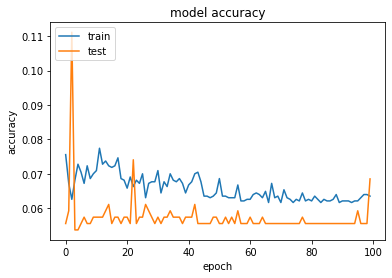

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

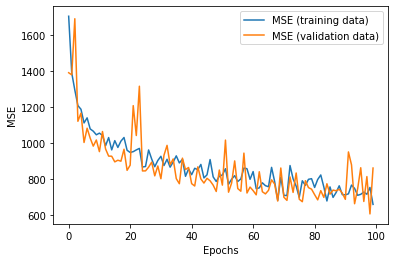

In [ ]:
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

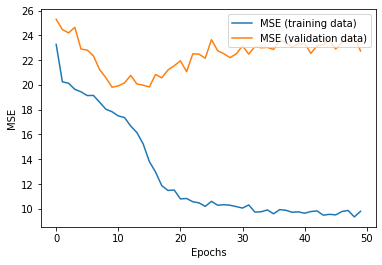

In [ ]:
plt.plot(history.history['loss'], label='MSE (training data)')
plt.plot(history.history['val_loss'], label='MSE (validation data)')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

In [ ]:
pred = model.predict(x)

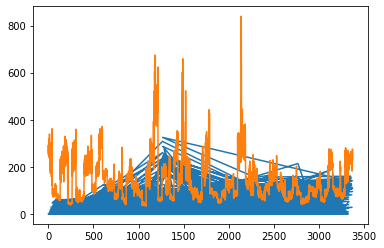

In [ ]:
plt.plot(y_train)
plt.plot(pred)